In [1]:
# importing necessary libraires and loading the data set
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Drop rows with missing values
df = df[["age", "fare", "survived"]].dropna()

df.head()


,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [2]:
# data preparation
# Define Features (X) and Target (y)
X = df[["age", "fare"]]  # Features
y = df["survived"]       # Target (1 = survived, 0 = not survived)

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# model training
# Create & train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")



Model Accuracy: 0.63


In [4]:
# Confusion Matrix
# Print Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


              precision    recall  f1-score   support

           0       0.65      0.84      0.73        87
           1       0.55      0.30      0.39        56

    accuracy                           0.63       143
   macro avg       0.60      0.57      0.56       143
weighted avg       0.61      0.63      0.60       143

Confusion Matrix:
 [[73 14]
 [39 17]]


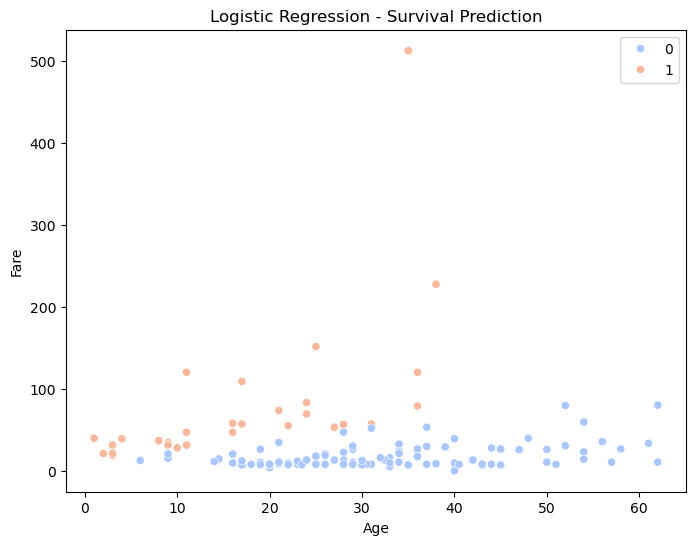

In [5]:
import seaborn as sns

# Scatter plot to see decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test["age"], y=X_test["fare"], hue=y_pred, palette="coolwarm")
plt.title("Logistic Regression - Survival Prediction")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()
